## __MODELING__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve
import sklearn
sklearn.metrics.SCORERS.keys()
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectPercentile, univariate_selection, RFE

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
building = pd.read_csv("D:\Project\Project\earthquake\earthquake_sample.csv")

In [3]:
building.head()

,damage,Unnamed: 1,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage.1
0,High Damage,281158,281158,234607001581,23,2301,230106,3,0,34,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
1,High Damage,537666,537666,302001000371,30,3004,300401,2,0,25,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
2,High Damage,519443,519443,300901000841,30,3007,300704,3,0,35,...,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Reconstruction,High Damage
3,High Damage,147534,147534,213802000481,21,2106,210606,2,1,11,...,0,0,0,0,0,0,0,Damaged-Not used,Reconstruction,High Damage
4,High Damage,640713,640713,312008081571,31,3104,310408,1,0,15,...,0,1,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,High Damage


In [80]:
building['district_id'].nunique()

KeyError: 'district_id'

In [4]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37930 entries, 0 to 37929
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   damage                                  37930 non-null  object 
 1   Unnamed: 1                              37930 non-null  int64  
 2   Unnamed: 0                              37930 non-null  int64  
 3   building_id                             37930 non-null  int64  
 4   district_id                             37930 non-null  int64  
 5   vdcmun_id                               37930 non-null  int64  
 6   ward_id                                 37930 non-null  int64  
 7   count_floors_pre_eq                     37930 non-null  int64  
 8   count_floors_post_eq                    37930 non-null  int64  
 9   age_building                            37930 non-null  int64  
 10  plinth_area_sq_ft                       37930 non-null  fl

In [5]:
building.shape

(37930, 34)

In [6]:
building.drop(["Unnamed: 0","Unnamed: 1", "building_id", "district_id", "vdcmun_id", "ward_id", "has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered", "has_superstructure_other" ], axis=1, inplace=True)

In [7]:
building.head()

,damage,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed,damage.1
0,High Damage,3,0,34,32.52,5.49,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble unclear,Reconstruction,High Damage
1,High Damage,2,0,25,29.26,4.27,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble unclear,Reconstruction,High Damage
2,High Damage,3,0,35,98.10,9.14,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Brick/Stone,Timber-Planck,Not attached,Rectangular,Damaged-Rubble Clear-New building built,Reconstruction,High Damage
3,High Damage,2,1,11,27.87,3.66,1.83,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Reconstruction,High Damage
4,High Damage,1,0,15,41.81,2.44,0.00,Flat,Mud mortar-Stone/Brick,RCC/RB/RBC,RC,Not applicable,Not attached,Rectangular,Damaged-Rubble clear,Reconstruction,High Damage


In [8]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37930 entries, 0 to 37929
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   damage                       37930 non-null  object 
 1   count_floors_pre_eq          37930 non-null  int64  
 2   count_floors_post_eq         37930 non-null  int64  
 3   age_building                 37930 non-null  int64  
 4   plinth_area_sq_ft            37930 non-null  float64
 5   height_ft_pre_eq             37930 non-null  float64
 6   height_ft_post_eq            37930 non-null  float64
 7   land_surface_condition       37930 non-null  object 
 8   foundation_type              37930 non-null  object 
 9   roof_type                    37930 non-null  object 
 10  ground_floor_type            37930 non-null  object 
 11  other_floor_type             37930 non-null  object 
 12  position                     37930 non-null  object 
 13  plan_configurati

In [9]:
bu = building[["age_building", "count_floors_pre_eq", "plinth_area_sq_ft","height_ft_pre_eq", "foundation_type", "roof_type", "ground_floor_type",'other_floor_type', "damage"]]

In [10]:
bu

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type,damage
0,34,3,32.52,5.49,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,High Damage
1,25,2,29.26,4.27,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,High Damage
2,35,3,98.10,9.14,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Brick/Stone,Timber-Planck,High Damage
3,11,2,27.87,3.66,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,High Damage
4,15,1,41.81,2.44,Mud mortar-Stone/Brick,RCC/RB/RBC,RC,Not applicable,High Damage
...,...,...,...,...,...,...,...,...,...
37925,22,3,53.51,7.32,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Low Damage
37926,7,2,37.90,3.66,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Low Damage
37927,20,2,55.74,3.96,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Low Damage
37928,15,2,32.52,4.88,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Low Damage


In [11]:
cat_building = ["foundation_type", "roof_type", "ground_floor_type", 'other_floor_type']
num_building = ["age_building", "count_floors_pre_eq", "plinth_area_sq_ft","height_ft_pre_eq"]

In [12]:
bu['damage'] = bu['damage'].map({'Low Damage' : 0, 'High Damage' : 1})

<ipython-input-12-5c422f57ed58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bu['damage'] = bu['damage'].map({'Low Damage' : 0, 'High Damage' : 1})


In [13]:
bu['damage'].value_counts()

1    22877
0    15053
Name: damage, dtype: int64

In [14]:
bu['damage'].value_counts(normalize=True)*100

1    60.313736
0    39.686264
Name: damage, dtype: float64

Dari presentase data High damage dan Low damage, data tersebut sudah cukup balance, sehingga saya tidak akan melakukan resampling

## __TRAIN TEST SPLIT__

In [15]:
X = bu.drop('damage', axis=1)
y = bu['damage']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size =0.2, random_state=1510)

In [16]:
X_train.head()

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type
14415,56,3,40.97,6.10,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck
11761,30,3,38.09,6.10,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud
19761,28,3,38.65,6.40,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud
6003,10,3,30.10,4.88,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud
7903,20,2,35.67,6.40,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud


In [17]:
X_test.head()

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type
12974,15,3,42.74,7.32,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud
16644,15,2,27.87,6.40,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud
12651,9,1,37.90,6.10,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable
8368,8,2,14.40,9.14,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud
36684,17,1,37.16,2.44,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Other,Not applicable


In [18]:
y_test.head()

12974    1
16644    1
12651    1
8368     1
36684    0
Name: damage, dtype: int64

In [19]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

Untuk pemilihan modeling, saya memilih 3 yaitu KNN, Decision Tree dan Random forest

## __K NEAREST NEIGHBORS__

In [20]:
knn_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_numeric', knn_pipe_num, num_building),
    ('pipe_cat', knn_pipe_cat, cat_building)
])

# combine all pipeline
knn_pipe = Pipeline([
    ('transformer', knn_transformer),
    ('knn', knn)
])

In [21]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

## __DECISION TREE CLASSIFICATION__

In [22]:
dtc_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])
#DTC RFC gak perlu discaller
# for all object columns
dtc_pipe_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

# transforming all columns
dtc_transformer = ColumnTransformer([
    ('pipe_numeric', dtc_pipe_num, num_building),
    ('pipe_cat', dtc_pipe_cat, cat_building)
])

# combine all pipeline
dtc_pipe = Pipeline([
    ('transformer', dtc_transformer),
    ('dtc', dtc)
])

In [23]:
dtc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

## __RANDOM FOREST CLASSIFICATION__

In [24]:
rfc_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_numeric', rfc_pipe_num, num_building),
    ('pipe_cat', rfc_pipe_cat, cat_building)
])

# combine all pipeline
rfc_pipe = Pipeline([
    ('transformer', rfc_transformer),
    ('rfc', rfc)
])

In [25]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

## __CROSS VALIDATION SCORE__

In [26]:
skfold = StratifiedKFold(n_splits=5, random_state=1510, shuffle=True)

knn_score = cross_val_score(knn_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(dtc_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(rfc_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


Pada kasus ini saya fokus untuk menekan hasil predik low damage tetapi actualnya adalah high damage, sehingga saya menekan FN, oleh karena itu saya fokus di score recall

In [27]:
print('KNN Val Score:', knn_score)
print('DTC Val Score:', dtc_score)
print('RFC Val Score:', rfc_score)

KNN Val Score: [0.80524447 0.81343895 0.79644809 0.7920765  0.79535519]
DTC Val Score: [0.68014204 0.67413275 0.68306011 0.67431694 0.66393443]
RFC Val Score: [0.78229992 0.78830921 0.78579235 0.77650273 0.7773224 ]


In [28]:
print('KNN Val Score:', knn_score.mean())
print('DTC Val Score:', dtc_score.mean())
print('RFC Val Score:', rfc_score.mean())

KNN Val Score: 0.8005126402502825
DTC Val Score: 0.6751172527438083
RFC Val Score: 0.7820453219058366


In [ ]:
#Cek stabilitas bisa pakai std, semakin kecil model semakin stabil
#pakai line plot di val score

In [29]:
dtcs = dtc_score.mean()
rfcs = rfc_score.mean()
kncs = knn_score.mean()
df = pd.DataFrame({'KNearest Neighbors': [kncs], 'Decision Tree CV Score': [dtcs], 'Random Forest CV Score': [rfcs]})
df

,KNearest Neighbors,Decision Tree CV Score,Random Forest CV Score
0,0.800513,0.675117,0.782045


Perbandingan nilai CV score sebelum dilakukan hyperparameter tunning antara 3 model ini terlihat KNN bernilai paling besar, yakni 0.8

## __HYPERPARAMETER TUNNING__

> ## KNN HYPERPARAM

In [30]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_numeric',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['age_building', 'count_floors_pre_eq',
                                     'plinth_area_sq_ft', 'height_ft_pre_eq']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first'))]),
                                    ['foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type'])])),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('pipe_numeric',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                                  ['age_building', 'count_floors_pre_eq',
                                   'plinth_

In [31]:
knn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'knn', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_cat', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'transformer__pipe_cat__memory', 'transformer__pipe_cat__steps', 'transformer__pipe_cat__verbose', 'transformer__pipe_cat__encoder', 'transformer__pipe_cat__encoder__categories', 'transformer__pipe_cat__encoder__drop', 'transformer__pipe_cat__encoder__dtype', 'transformer__pipe_cat__encoder__handle_unknown', 'transformer__pipe_cat__encoder__sparse', 'knn__algori

In [32]:
knn_param = {'knn__n_neighbors': [5, 10, 20, 30, 40 ,50, 60 ,70, 80, 90, 100, 110, 120, 130], 
             'knn__p': [1,2], 
             'knn__leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

knn_tuned = GridSearchCV(estimator=knn_pipe,
                          param_grid=knn_param, 
                          cv=skfold,
                          n_jobs=-1,
                          scoring='recall',
                          verbose=1
                          )

In [33]:
knn_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 13.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['age_building',
                                                                          'count_floors_pre_eq',
                                                                          'plinth_area_sq_ft',
                                                                          'height_ft_pre_eq']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('encoder',
     

In [34]:
report_grid = pd.DataFrame(knn_tuned.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__leaf_size,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
278,0.465933,0.010734,7.445137,0.431884,100,130,1,"{'knn__leaf_size': 100, 'knn__n_neighbors': 13...",0.944551,0.939634,0.94153,0.933607,0.942077,0.94028,0.003687,1
82,0.450942,0.026134,5.873437,0.020091,30,130,1,"{'knn__leaf_size': 30, 'knn__n_neighbors': 130...",0.944551,0.939634,0.94153,0.933607,0.942077,0.94028,0.003687,1
110,0.478526,0.034734,6.026348,0.100338,40,130,1,"{'knn__leaf_size': 40, 'knn__n_neighbors': 130...",0.944551,0.939634,0.94153,0.933607,0.942077,0.94028,0.003687,1


In [35]:
knn_tuned.best_params_

{'knn__leaf_size': 30, 'knn__n_neighbors': 130, 'knn__p': 1}

In [36]:
knn_tun = knn_tuned.best_estimator_

In [37]:
knn_tun

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

In [38]:
knn_tuned_score = cross_val_score(knn_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
knn_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


array([0.94455067, 0.93963398, 0.94153005, 0.93360656, 0.9420765 ])

In [39]:
print(knn_tuned_score.mean())

0.9402795527514206


> ## DTC HYPERPARAM

In [40]:
dtc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'dtc', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_cat', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'transformer__pipe_cat__memory', 'transformer__pipe_cat__steps', 'transformer__pipe_cat__verbose', 'transformer__pipe_cat__encoder', 'transformer__pipe_cat__encoder__categories', 'transformer__pipe_cat__encoder__drop', 'transformer__pipe_cat__encoder__dtype', 'transformer__pipe_cat__encoder__handle_unknown', 'transformer__pipe_cat__encoder__sparse', 'dtc__ccp_al

In [41]:
dtc_param = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth':[5,10,15,20,25,30],
    'dtc__min_samples_split':[2,5,10],
    'dtc__min_samples_leaf':[1,2,5,7],
}

dtc_tuned = GridSearchCV(estimator=dtc_pipe, 
                            param_grid=dtc_param, 
                            cv=skfold, 
                            n_jobs=-1, 
                            scoring='recall',
                           verbose=1)

In [42]:
dtc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   29.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['age_building',
                                                                          'count_floors_pre_eq',
                                                                          'plinth_area_sq_ft',
                                                                          'height_ft_pre_eq']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('encoder',
     

In [43]:
report_grid = pd.DataFrame(dtc_tuned.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtc__criterion,param_dtc__max_depth,param_dtc__min_samples_leaf,param_dtc__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
82,0.205881,0.021135,0.031783,0.001720,entropy,5,7,5,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.950014,0.951653,0.946448,0.925683,0.931421,0.941044,0.010495,1
81,0.199686,0.013915,0.030980,0.002279,entropy,5,7,2,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.950014,0.951653,0.946448,0.925683,0.931421,0.941044,0.010495,1
83,0.199284,0.017409,0.032583,0.001959,entropy,5,7,10,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.950014,0.951653,0.946448,0.925683,0.931421,0.941044,0.010495,1


In [44]:
dtc_tuned.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 5,
 'dtc__min_samples_leaf': 7,
 'dtc__min_samples_split': 2}

In [45]:
dtc_tuned.best_score_

0.9410436247971903

In [46]:
dtc_tuned.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

In [47]:
dtc_tun = dtc_tuned.best_estimator_

In [48]:
dtc_tuned_score = cross_val_score(dtc_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


array([0.95001366, 0.95165255, 0.94644809, 0.92568306, 0.93142077])

In [49]:
dtc_tuned_score.mean()

0.9410436247971903

> ## RFC HYPERPARAM

In [50]:
rfc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'rfc', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_cat', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'transformer__pipe_cat__memory', 'transformer__pipe_cat__steps', 'transformer__pipe_cat__verbose', 'transformer__pipe_cat__encoder', 'transformer__pipe_cat__encoder__categories', 'transformer__pipe_cat__encoder__drop', 'transformer__pipe_cat__encoder__dtype', 'transformer__pipe_cat__encoder__handle_unknown', 'transformer__pipe_cat__encoder__sparse', 'rfc__bootst

In [51]:
rfc_param = {'rfc__n_estimators': [400, 800, 1100, 1500, 2000],
            'rfc__max_depth': [None,5, 10, 20, 30, 50, 70, 90],
            'rfc__min_samples_split': [2, 5, 10],
            'rfc__max_features': ['auto', 'sqrt'],
            'rfc__min_samples_leaf' : [2, 4, 6]
           }


rfc_tuned = RandomizedSearchCV(estimator=rfc_pipe, 
                            param_distributions=rfc_param,
                            n_iter=100,
                            cv=skfold, 
                            n_jobs=-1, 
                            scoring='recall',
                           verbose=1)

In [52]:
rfc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 48.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('pipe_numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                RobustScaler())]),
                                                                               ['age_building',
                                                                                'count_floors_pre_eq',
                                                                                'plinth_area_sq_ft',
                                                                                'height_ft_pre_eq']),
                                                                              ('pipe_cat',
                                              

In [53]:
report_grid = pd.DataFrame(rfc_tuned.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__n_estimators,param_rfc__min_samples_split,param_rfc__min_samples_leaf,param_rfc__max_features,param_rfc__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
99,48.879416,4.292714,1.722011,0.319868,2000,10,6,sqrt,10,"{'rfc__n_estimators': 2000, 'rfc__min_samples_...",0.945643,0.947009,0.94153,0.940984,0.945082,0.94405,0.002371,1


In [54]:
rfc_tuned.best_params_

{'rfc__n_estimators': 2000,
 'rfc__min_samples_split': 10,
 'rfc__min_samples_leaf': 6,
 'rfc__max_features': 'sqrt',
 'rfc__max_depth': 10}

In [55]:
rfc_tuned.best_score_

0.9440495818425794

In [56]:
rfc_tuned.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

In [57]:
rfc_tun = rfc_tuned.best_estimator_

In [58]:
rfc_tuned_score = cross_val_score(rfc_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   40.7s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.5s finished


array([0.94618957, 0.94700901, 0.94098361, 0.94098361, 0.94508197])

In [59]:
rfc_tuned_score.mean()

0.9440495519901845

In [60]:
knncst = knn_tuned_score.mean()
dtcst = dtc_tuned_score.mean()
rfcst = rfc_tuned_score.mean()

dft = pd.DataFrame({'KNearest Neighbors':[knncst], 'Decision Tree CV Score': [dtcst], 'Random Forest CV Score': [rfcst]})
dft

,KNearest Neighbors,Decision Tree CV Score,Random Forest CV Score
0,0.94028,0.941044,0.94405


In [61]:
knncv = knn_score.mean()
knncv2 = knn_tuned_score.mean()
sdtcv = dtc_score.mean()
sdtcv2 = dtc_tuned_score.mean()
srfcv = rfc_score.mean()
srfcv2 = rfc_tuned_score.mean()


cc = {
    'Before Tuned' : [knncv, sdtcv, srfcv],
    'After Tuned': [knncv2, sdtcv2, srfcv2]
}

_score = pd.DataFrame(data=cc, index=["KNearest Neighbors", 'Decision Tree', 'Random Forest'])
_score


,Before Tuned,After Tuned
KNearest Neighbors,0.800513,0.940280
Decision Tree,0.675117,0.941044
Random Forest,0.782045,0.944050


Untuk hasil perbandingan antara 3 model ini, KNN sebelum dilakukan tunning mendapat nilai 0.8, lebih besar dibandingkan DTC dan RFC, namun setelah dilakukan Hyper parameter tuning, model RFC lebih besar yaitu diangka 0.943 sehingga model yang saya pilih adalah RFC

> ## Best Model RANDOM FOREST

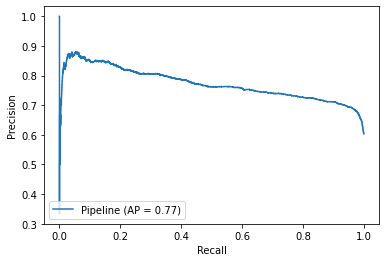

In [62]:
plot_precision_recall_curve(rfc_tun, X_test, y_test)

In [63]:
p, r, t = precision_recall_curve(y_test, rfc_tun.predict_proba(X_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
pr_df

,precision,recall,threshold
0,0.603244,1.000000,0.011079
1,0.603191,0.999781,0.011199
2,0.603350,0.999781,0.011286
3,0.603430,0.999781,0.011447
4,0.603510,0.999781,0.011505
...,...,...,...
7451,0.600000,0.000656,0.872082
7452,0.500000,0.000437,0.872164
7453,0.333333,0.000219,0.872550
7454,0.500000,0.000219,0.881010


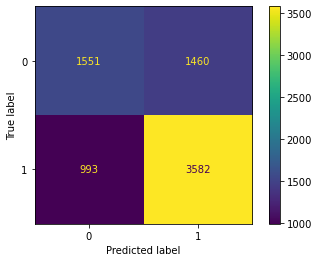

In [64]:
rfc_pipe.fit(X_train, y_train)
plot_confusion_matrix(rfc_pipe, X_test, y_test)

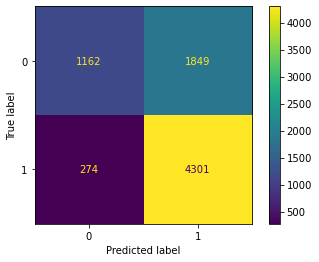

In [65]:
rfc_tun.fit(X_train, y_train)
plot_confusion_matrix(rfc_tun, X_test, y_test)

In [66]:
precision_score(y_test, rfc_tun.predict(X_test))

0.699349593495935

In [67]:
recall_score(y_test, rfc_tun.predict(X_test))

0.9401092896174863

In [77]:
print('ratio predik yang memberikan kerugian:', 274/1436*100)

ratio predik yang memberikan kerugian: 19.080779944289695


In [78]:
print('ratio kerugian yang dapat dihindari:', 4301/6150*100)

ratio kerugian yang dapat dihindari: 69.9349593495935


Setelah dilakukan scoring, didapat bahwa RFC merupakan best model dengan skor 0.94
saya memberi fokus disini untuk menekan nilai FN yaitu mengurangi predik low damage(0) tetapi kenyataanya adalah high damage(1)
alasanya adalah disini bertujuan untuk mengurangi biaya akibat kerusakan infrastruktur, sehingga jika nilai jumlah FN nya besar maka
dapat menjadi sebuah kerugian.
dari matrix diatas setelah di tun didapat nilai 274 yang di predict 0 tetapi kenyataanya 1.
ini menunjukan bahwa dari confusion matrix ini hanya 19% yang memberikan kerugian, dan dapat mengantisipasi kerugian sebesar 69.9%
disini saya tidak mengatur threshold karena menurut saya, default threshold telah menunjukan nilai recall yang besar dengan precision score yang masih dibilang bagus

## __IMPORT MODEL__

In [70]:
import joblib

In [71]:
rfc_tun.fit(X, y)
filename = 'Model.sav'
joblib.dump(rfc_tun, filename)

['Model.sav']

In [72]:
build1 = pd.DataFrame([{
    'age_building': 55,
    'count_floors_pre_eq': 2,
    'plinth_area_sq_ft': 100,
    'height_ft_pre_eq': 15,
    'foundation_type' : 'Mud mortar-Stone/Brick',
    'roof_type': 'Bamboo/Timber-Light roof',
    'ground_floor_type': 'Mud',
    'other_floor_type': 'Not applicable'
}], index=[0])

In [73]:
# build1

In [75]:
rfc_tun.predict(build1) # threshold default (0.5)

array([1], dtype=int64)

In [76]:
# bu

In [ ]:
# model_rf = joblib.load('Model.sav') Load